# Case Study #2

In [1]:
!pip install ucimlrepo



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 


In [19]:
X.shape

(4424, 36)

In [20]:
X.columns

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [22]:
print(X.isnull().sum())

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [23]:
print(X.duplicated().sum())

0


In [24]:
y['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [25]:
y.loc['Target'] = y['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

C:\conda_tmp\ipykernel_8032\344434461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc['Target'] = y['Target'].map({


In [26]:
X.describe()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [59]:
student_y[:len(student_y)-1]

,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate
...,...
4419,Graduate
4420,Dropout
4421,Dropout
4422,Graduate


In [27]:
student_x = X
student_y = y

In [60]:
student_y = student_y[:len(student_y)-1]
student_x_train, student_x_test, student_y_train, student_y_test = train_test_split(student_x, student_y, test_size=1/3, random_state=42)


In [28]:
import pickle
import numpy as np
import os


In [32]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [33]:
def load_cifar100_data(data_dir):
    # Load training data
    train_file = os.path.join(data_dir, 'train')
    train_data_dict = unpickle(train_file)
    x_train = train_data_dict[b'data']
    y_train = train_data_dict[b'fine_labels']  # or b'coarse_labels' for coarse labels

    # Load testing data
    test_file = os.path.join(data_dir, 'test')
    test_data_dict = unpickle(test_file)
    x_test = test_data_dict[b'data']
    y_test = test_data_dict[b'fine_labels']  # or b'coarse_labels' for coarse labels

    # Load meta data
    meta_file = os.path.join(data_dir, 'meta')
    meta_data_dict = unpickle(meta_file)
    label_names = meta_data_dict[b'fine_label_names']  # or b'coarse_label_names'

    return (x_train, y_train), (x_test, y_test), label_names


In [38]:
(cifar_x_train, cifar_y_train), (cifar_x_test, cifar_y_test), label_names = load_cifar100_data('cifar-100-python')

In [39]:
# Reshape the data: CIFAR-100 images are 32x32 pixels with 3 color channels (RGB)
cifar_x_train = cifar_x_train.reshape((-1, 3, 32, 32)).transpose(0, 2, 3, 1)
cifar_x_test = cifar_x_test.reshape((-1, 3, 32, 32)).transpose(0, 2, 3, 1)

# Normalize pixel values
cifar_x_train, cifar_x_test = cifar_x_train / 255.0, cifar_x_test / 255.0

In [ ]:
!pip install h5py

In [41]:
import h5py
h5f = h5py.File('./SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

In [42]:
len(X_train), len(X_test),X_train.shape, X_test.shape

(42000, 18000, (42000, 32, 32), (18000, 32, 32))

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255
X_test = X_test/255

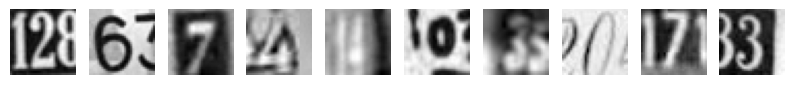

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [48]:
svh_x_train, svh_x_test, svh_y_train, svh_y_test = X_train, X_test, y_train, y_test

In [55]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tabulate import tabulate
from sklearnex import patch_sklearn 
patch_sklearn()
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from skimage import feature as ft
import time

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [61]:
student_X_train, student_X_val, student_y_train, student_y_val = train_test_split(student_x_train, student_y_train, test_size=1/3, random_state=42)
cifar_X_train, cifar_X_val, cifar_y_train, cifar_y_val = train_test_split(cifar_x_train, cifar_y_train, test_size=1/3, random_state=42)
svh_X_train, svh_X_val, svh_y_train, svh_y_val = train_test_split(svh_x_train, svh_y_train, test_size=1/3, random_state=42)

In [94]:
def find_best_rf_parameters(X_train, y_train, X_val, y_val):
    if len(X_train.shape) == 4:
        n_samples_train, img_height, img_width, n_channels = X_train.shape
        X_train = X_train.reshape((n_samples_train, img_height * img_width * n_channels))
    
    if len(X_val.shape) == 4:
        n_samples_val, _, _, _ = X_val.shape
        X_val = X_val.reshape((n_samples_val, img_height * img_width * n_channels))

    if len(X_train.shape) == 3:
        n_samples_train, img_height, img_width = X_train.shape
        X_train = X_train.reshape((n_samples_train, img_height * img_width))
    
    if len(X_val.shape) == 3:
        n_samples_val, _, _= X_val.shape
        X_val = X_val.reshape((n_samples_val, img_height * img_width ))
        
    rf_param_grid = {
        'n_estimators': [10, 50, 100],
        'criterion': ['entropy', 'gini'],
        'max_depth': [10, 50, 100],
        'max_features': ["sqrt", "log2"]
    }
    rf_grid = ParameterGrid(rf_param_grid)
    data = []
    head = ['n_estimators', 'criterion', 'max_depth', 'max_features', 'score in validation set']

    start_time = time.time()
    for param in rf_grid:
        rf_model = RandomForestClassifier(**param, n_jobs = -1)
        rf_model.fit(X_train, y_train)
        score = rf_model.score(X_val, y_val)
        list_entry = [param['n_estimators'],  param['criterion'], param['max_depth'], param['max_features'], score]
        data.insert(0, list_entry)

    # Find the best model
    max_accuracy = max(entry[4] for entry in data)
    best_model = max(data, key=lambda x: x[4])

    # Print the results in a table format
    print(tabulate(data, headers=head, tablefmt="pipe"))
    print("--- %s seconds ---" % (time.time() - start_time))
    print("The highest Accuracy {:.5f} is the model with n_estimators = {}, criterion = '{}', max_depth = {}, and max_features = '{}'"
          .format(best_model[4], best_model[0], best_model[1], best_model[2], best_model[3]))
    return best_model

In [86]:
best_params_student = find_best_rf_parameters(student_X_train, student_y_train.values.flatten(), student_X_val, student_y_val.values.flatten())

|   n_estimators | criterion   |   max_depth | max_features   |   score in validation set |
|---------------:|:------------|------------:|:---------------|--------------------------:|
|            100 | gini        |         100 | log2           |                  0.769074 |
|             50 | gini        |         100 | log2           |                  0.772126 |
|             10 | gini        |         100 | log2           |                  0.741607 |
|            100 | gini        |         100 | sqrt           |                  0.769074 |
|             50 | gini        |         100 | sqrt           |                  0.770092 |
|             10 | gini        |         100 | sqrt           |                  0.766022 |
|            100 | gini        |          50 | log2           |                  0.772126 |
|             50 | gini        |          50 | log2           |                  0.765005 |
|             10 | gini        |          50 | log2           |                 

In [87]:
best_params_cifar = find_best_rf_parameters(cifar_X_train, cifar_y_train, cifar_X_val, cifar_y_val)

|   n_estimators | criterion   |   max_depth | max_features   |   score in validation set |
|---------------:|:------------|------------:|:---------------|--------------------------:|
|            100 | gini        |         100 | log2           |                  0.194396 |
|             50 | gini        |         100 | log2           |                  0.175976 |
|             10 | gini        |         100 | log2           |                  0.107818 |
|            100 | gini        |         100 | sqrt           |                  0.201896 |
|             50 | gini        |         100 | sqrt           |                  0.179756 |
|             10 | gini        |         100 | sqrt           |                  0.112198 |
|            100 | gini        |          50 | log2           |                  0.197276 |
|             50 | gini        |          50 | log2           |                  0.172677 |
|             10 | gini        |          50 | log2           |                 

In [89]:
svh_X_train.shape

(28000, 32, 32)

In [95]:
best_params_svh = find_best_rf_parameters(svh_X_train, svh_y_train, svh_X_val, svh_y_val)

KeyboardInterrupt: 

In [96]:
!pip install \
    --extra-index-url=https://pypi.nvidia.com \
    cudf-cu12==23.12.* dask-cudf-cu12==23.12.* cuml-cu12==23.12.* \
    cugraph-cu12==23.12.* cuspatial-cu12==23.12.* cuproj-cu12==23.12.* \
    cuxfilter-cu12==23.12.* cucim-cu12==23.12.* pylibraft-cu12==23.12.* \
    raft-dask-cu12==23.12.*

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [17 lines of output]
  Traceback (most recent call last):
    File "C:\Users\Watani Mall\Desktop\Ai-Lab\Ai_lab\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\Watani Mall\Desktop\Ai-Lab\Ai_lab\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
    File "C:\Users\Watani Mall\Desktop\Ai-Lab\Ai_lab\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
      return hook(config_settings)
    File "C:\conda_tmp\pip-build-env-3dnp7d5t\overlay\Lib\site-packages\setuptools\build_meta.py", line 325, in get_requires_for_build_wheel
      return self._get_build_requires(config_settings, requirements=['wheel'])
    File "C:\conda_tmp\

In [97]:
!conda create --solver=libmamba -n rapids-23.12 -c rapidsai -c conda-forge -c nvidia  \
    rapids=23.12 python=3.9 cuda-version=12.0

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: --solver=libmamba


In [98]:
!pip install \
    --extra-index-url=https://pypi.nvidia.com \
    cudf-cu11==23.12.* dask-cudf-cu11==23.12.* cuml-cu11==23.12.* \
    cugraph-cu11==23.12.* cuspatial-cu11==23.12.* cuproj-cu11==23.12.* \
    cuxfilter-cu11==23.12.* cucim-cu11==23.12.* pylibraft-cu11==23.12.* \
    raft-dask-cu11==23.12.*

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [17 lines of output]
  Traceback (most recent call last):
    File "C:\Users\Watani Mall\Desktop\Ai-Lab\Ai_lab\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\Watani Mall\Desktop\Ai-Lab\Ai_lab\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
    File "C:\Users\Watani Mall\Desktop\Ai-Lab\Ai_lab\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
      return hook(config_settings)
    File "C:\conda_tmp\pip-build-env-heyiw43s\overlay\Lib\site-packages\setuptools\build_meta.py", line 325, in get_requires_for_build_wheel
      return self._get_build_requires(config_settings, requirements=['wheel'])
    File "C:\conda_tmp\

In [101]:
!conda --version

conda 22.9.0
